In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./data/survey_results_public.csv")
df.columns

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)

In [3]:
pd.set_option('display.max_columns', None) # Poder ver todas las columnas del dataset sin limite


In [24]:
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [5]:
df.isna().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

Eliminamos aquellas columnas con un umbral superior al 30% de nulos, exceptuando ConvertedCompYearly, que aunque sabemos que tiene mas de la mitad de nulos, siguen siendo una buena cantidad de lineas y haremos el analisis sobre estas.

In [6]:
col_buenas = []
for column in df.columns:
    if column == 'ConvertedCompYearly':  # Excepción para esta columna
        col_buenas.append(column)
    elif df[column].isnull().mean() <= 0.30:  # Cumple con el umbral
        col_buenas.append(column)

df_limpio = df[col_buenas]
df_limpio

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOHow,SOComm,AISelect,AISent,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,Yes,Very favorable,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,20,17,"Developer, full-stack",NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,Microsoft Teams;Slack,Slack,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,37,27,Developer Experience,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,C#,C#,C#,Firebase Realtime Database,MSBuild,MSBuild,Visual Studio,Visual Studio,Visual Studio,Windows,Windows,NaN,Google Chat;Google Meet;Microsoft Teams;Zoom,Google Chat;Google Meet;Zoom,Stack Overflow;Stack Exchange;Stack Overflow B...,Multiple times per day,Yes,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,Appropriate in length,Easy,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,4,NaN,"Developer, full-stack",NaN,NaN,Canada,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,HTML/CSS;Java;JavaScript;PowerShell;Python;SQL...,MongoDB;MySQL;PostgreSQL;SQLite,Docker;npm;Pip,Docker;Kubernetes;npm,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Stack Overflow,Daily or almost daily,No,Quickly finding code solutions,"No, not really",Yes,Very favorable,Too long,Easy,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,9,NaN,"Developer, full-stack",NaN,NaN,Norway,NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,C++;HTML/CSS;JavaScript;Lua;Python,C++;HTML/CSS;JavaScript;Lua;Python,PostgreSQL;SQLite,APT;Make;npm,APT;Make,Vim,Vim,Vim,Other (please specify):,NaN,GitHub Discussions;Markdown File;Obsidian;Stac...,Discord;Whatsapp,Discord;Whatsapp,Stack Overflow for Teams (private knowled

41 columnas aun son demasiadas, vamos a elegir manualmente las que creemos que van a ser mas interesantes para este analisis y de paso las traducimos

In [7]:
col_limpio = {
    'MainBranch': 'Actividad_Principal',
    'Country': 'Pais',
    'EdLevel': 'Nivel_Educativo',
    'RemoteWork': 'Trabajo_Remoto',
    'LanguageHaveWorkedWith': 'Lenguajes_Utilizados',
    'YearsCodePro': 'Años_Exp',
    'OrgSize': 'Tamaño_Organizacion',
    'ConvertedCompYearly': 'Salario_Anual'

}

In [8]:
df_final = df_limpio[list(col_limpio.keys())].rename(columns=col_limpio)

df_final


,Actividad_Principal,Pais,Nivel_Educativo,Trabajo_Remoto,Lenguajes_Utilizados,Años_Exp,Tamaño_Organizacion,Salario_Anual
0,I am a developer by profession,United States of America,Primary/elementary school,Remote,NaN,NaN,NaN,NaN
1,I am a developer by profession,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,17,NaN,NaN
2,I am a developer by profession,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,C#,27,NaN,NaN
3,I am learning to code,Canada,Some college/university study without earning ...,NaN,C;C++;HTML/CSS;Java;JavaScript;PHP;PowerShell;...,NaN,NaN,NaN
4,I am a developer by profession,Norway,"Secondary school (e.g. American high school, G...",NaN,C++;HTML/CSS;JavaScript;Lua;Python;Rust,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
65432,I am a developer by profession,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,NaN,3,2 to 9 employees,NaN
65433,I am a developer by profession,NaN,NaN,Remote,NaN,NaN,NaN,NaN
65434,I am a developer by profession,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",In-person,NaN,5,"1,000 to 4,999 employees",NaN
65435,I am a developer by profession,Germany,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)",C;C++;Go;Lua;Objective-C;Python;Rust;SQL,2,20 to 99 employees,NaN


Ahora si, vamos a eliminar las lineas que contengan nulos, pero unicamente lo nulos de la columna Salario_Anual, los otros veremos luego que hacemos

In [9]:
df_final = df_final.dropna(subset=['Salario_Anual'])
df_final

,Actividad_Principal,Pais,Nivel_Educativo,Trabajo_Remoto,Lenguajes_Utilizados,Años_Exp,Tamaño_Organizacion,Salario_Anual
72,I am a developer by profession,Pakistan,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)",Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,1,100 to 499 employees,7322.0
374,"I am not primarily a developer, but I write co...",Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)",C;C++;Fortran;MATLAB;Python;SQL,6,100 to 499 employees,30074.0
379,I am a developer by profession,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,JavaScript;Julia;Python;SQL;TypeScript,6,20 to 99 employees,91295.0
385,I am a developer by profession,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,Python,17,"Just me - I am a freelancer, sole proprietor, ...",53703.0
389,I am a developer by profession,United States of America,Some college/university study without earning ...,Remote,HTML/CSS;JavaScript;Python;SQL;TypeScript,7,10 to 19 employees,110000.0
...,...,...,...,...,...,...,...,...
41180,I am a developer by profession,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",In-person,C;Python,3,100 to 499 employees,44640.0
41184,I am a developer by profession,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)",Bash/Shell (all shells);C;HTML/CSS;Java;JavaSc...,30,"1,000 to 4,999 employees",170000.0
41185,I am a developer by profession,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,C;C#;C++;JavaScript;PowerShell;Python;SQL,15,100 to 499 employees,116844.0
41186,I am a developer by profession,United States of America,Some college/university study without earning ...,"Hybrid (some remote, some in-person)",C#;HTML/CSS;Java;JavaScript;PHP;Python,1,2 to 9 employees,12000.0


Vamos a ver cuantos nulos nos quedan, y valorar que hacemos con ellos.

In [10]:
df_final.isna().sum()

Actividad_Principal      0
Pais                     0
Nivel_Educativo          0
Trabajo_Remoto           8
Lenguajes_Utilizados    83
Años_Exp                90
Tamaño_Organizacion     25
Salario_Anual            0
dtype: int64

Limpiamos nulos

In [11]:
df_final = df_final.dropna()
df_final

,Actividad_Principal,Pais,Nivel_Educativo,Trabajo_Remoto,Lenguajes_Utilizados,Años_Exp,Tamaño_Organizacion,Salario_Anual
72,I am a developer by profession,Pakistan,"Secondary school (e.g. American high school, G...","Hybrid (some remote, some in-person)",Assembly;Bash/Shell (all shells);C;C++;HTML/CS...,1,100 to 499 employees,7322.0
374,"I am not primarily a developer, but I write co...",Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Hybrid (some remote, some in-person)",C;C++;Fortran;MATLAB;Python;SQL,6,100 to 499 employees,30074.0
379,I am a developer by profession,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,JavaScript;Julia;Python;SQL;TypeScript,6,20 to 99 employees,91295.0
385,I am a developer by profession,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Remote,Python,17,"Just me - I am a freelancer, sole proprietor, ...",53703.0
389,I am a developer by profession,United States of America,Some college/university study without earning ...,Remote,HTML/CSS;JavaScript;Python;SQL;TypeScript,7,10 to 19 employees,110000.0
...,...,...,...,...,...,...,...,...
41180,I am a developer by profession,Sweden,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",In-person,C;Python,3,100 to 499 employees,44640.0
41184,I am a developer by profession,United States of America,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Hybrid (some remote, some in-person)",Bash/Shell (all shells);C;HTML/CSS;Java;JavaSc...,30,"1,000 to 4,999 employees",170000.0
41185,I am a developer by profession,United States of America,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Remote,C;C#;C++;JavaScript;PowerShell;Python;SQL,15,100 to 499 employees,116844.0
41186,I am a developer by profession,United States of America,Some college/university study without earning ...,"Hybrid (some remote, some in-person)",C#;HTML/CSS;Java;JavaScript;PHP;Python,1,2 to 9 employees,12000.0


OK! Tenemos nuestro dataset listo finalmente con las +20000 lineas que vamos a usar. Antes de comenzar, vamos a ajustar algunos terminos para ayudar a la legibilidad posterior en graficas

In [12]:
# Reemplazar valores en la columna 'Actividad_Principal'

actividad_mapping = {
    'I am a developer by profession': 'Trabajo Principal',
    'I am not primarily a developer, but I write code sometimes as part of my work/studies': 'Hobby'
}

df_final['Actividad_Principal'] = df_final['Actividad_Principal'].replace(actividad_mapping)

# Reemplazar valores en la columna 'Trabajo_Remoto'

trabajo_mapping = {
    "Hybrid (some remote, some in-person)": "Hibrido",
    "Remote": "Remoto",
    "In-person": "Presencial"
}

df_final['Trabajo_Remoto'] = df_final['Trabajo_Remoto'].replace(trabajo_mapping)

# Reemplazar valores en la columna 'Tamaño_Organizacion'
tamano_mapping = {
    'Just me - I am a freelancer, sole proprietor, etc.': 'Individual',
    '2-9 employees': '2 a 10 empleados', '2 to 9 employees': '2 a 10 empleados',
    '10-19 employees': '11 a 100 empleados', '10 to 19 employees': '11 a 100 empleados',
    '20-99 employees': '11 a 100 empleados', '20 to 99 employees': '11 a 100 empleados',
    '100-499 employees': '101 a 500 empleados', '100 to 499 employees': '101 a 500 empleados',
    '500-999 employees': '501 a 1000 empleados', '500 to 999 employees': '501 a 1000 empleados',
    '1,000-4,999 employees': '1001 a 5000 empleados', '1,000 to 4,999 employees': '1001 a 5000 empleados',
    '5,000-9,999 employees': '+ 5000 empleados', '5,000 to 9,999 employees': '+ 5000 empleados',
    '10,000 or more employees': '+ 5000 empleados',
    'I don’t know': 'Desconocido',
}

df_final['Tamaño_Organizacion'] = df_final['Tamaño_Organizacion'].replace(tamano_mapping)

# Reemplazar valores en la columna Nivel_Educativo

nivel_mapping = {
    'Bachelor’s degree (B.A., B.S., B.Eng., etc.)': 'Licenciatura',
    'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)': 'Master',
    'Some college/university study without earning a degree': 'Universidad sin título',
    'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)': 'Secundaria',
    'Professional degree (JD, MD, Ph.D, Ed.D, etc.)': 'Grado Superior',
    'Associate degree (A.A., A.S., etc.)': 'Grado Medio',
    'Something else': 'Otro',
    'Primary/elementary school': 'Primaria'
}

df_final['Nivel_Educativo'] = df_final['Nivel_Educativo'].replace(nivel_mapping)

# Reemplazar valores en la columna Salario_Anual

df_final['Salario_Anual'] = df_final['Salario_Anual'].astype(int) #Quitamos el decimal

# Reemplazar valores en la columna Lenguajes_Utilizados

# Ya que Lenguajes_Utilizados tiene celdas en las que los lenguajes se repiten con valores unicos o por ";" vamos a expandir registros,
# para que cada lenguaje de programación se separe en una fila diferente

# Asegurarnos de separar correctamente y expandir los valores de la columna
df_final['Lenguajes_Utilizados'] = df_final['Lenguajes_Utilizados'].str.split(';')  # Separar por '; '
df_final_expandido = df_final.explode('Lenguajes_Utilizados', ignore_index=True)  # Expandir en filas individuales

# Reemplazar valores en la columna Años_Exp

def clasificar_experiencia(anios):
    try:
        anios = float(anios)
        if anios <= 2:
            return '0-2'
        elif anios >=3 and anios <= 5:
            return '3-5'
        elif anios >=5 and anios <= 10:
            return "6-10"
        else:
            return '10 o más'
    except ValueError:
        return 'Desconocido'

# Aplicar la clasificación a la columna 'Años_Exp'
df_final_expandido['Años_Exp'] = df_final_expandido['Años_Exp'].apply(clasificar_experiencia)



C:\Users\javid\AppData\Local\Temp\ipykernel_18364\3724333789.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Actividad_Principal'] = df_final['Actividad_Principal'].replace(actividad_mapping)
C:\Users\javid\AppData\Local\Temp\ipykernel_18364\3724333789.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['Trabajo_Remoto'] = df_final['Trabajo_Remoto'].replace(trabajo_mapping)
C:\Users\javid\AppData\Local\Temp\ipykernel_18364\3724333789.py:34: SettingWithCopyWarning: 
A value is trying 

In [13]:
df_final_expandido

,Actividad_Principal,Pais,Nivel_Educativo,Trabajo_Remoto,Lenguajes_Utilizados,Años_Exp,Tamaño_Organizacion,Salario_Anual
0,Trabajo Principal,Pakistan,Secundaria,Hibrido,Assembly,0-2,101 a 500 empleados,7322
1,Trabajo Principal,Pakistan,Secundaria,Hibrido,Bash/Shell (all shells),0-2,101 a 500 empleados,7322
2,Trabajo Principal,Pakistan,Secundaria,Hibrido,C,0-2,101 a 500 empleados,7322
3,Trabajo Principal,Pakistan,Secundaria,Hibrido,C++,0-2,101 a 500 empleados,7322
4,Trabajo Principal,Pakistan,Secundaria,Hibrido,HTML/CSS,0-2,101 a 500 empleados,7322
...,...,...,...,...,...,...,...,...
123249,Trabajo Principal,Switzerland,Otro,Hibrido,C++,10 o más,11 a 100 empleados,222834
123250,Trabajo Principal,Switzerland,Otro,Hibrido,Java,10 o más,11 a 100 empleados,222834
123251,Trabajo Principal,Switzerland,Otro,Hibrido,Objective-C,10 o más,11 a 100 empleados,222834
123252,Trabajo Principal,Switzerland,Otro,Hibrido,PHP,10 o más,11 a 100 empleados,222834


Guardamos el dataset limpio por precaución

In [14]:
df_final_expandido.to_csv('./dataset_expandido.csv', index=False)


# PRINCIPALES HIPOTESIS

___Relación entre lenguajes y salarios:___

Hipótesis: Los desarrolladores que utilizan ciertos lenguajes tienen un salario promedio más alto.

___Popularidad de lenguajes a nivel global:___

Hipótesis: Lenguajes como Python y JavaScript son significativamente más populares que otros.

___Trabajo remoto y lenguajes:___

Hipótesis: Los lenguajes más utilizados por trabajadores remotos difieren de los usados por quienes trabajan de forma presencial.

___Tamaño de organización y lenguajes:___

Hipótesis: Las organizaciones más grandes tienden a utilizar lenguajes más modernos en comparación con las pequeñas.


### · ___Relación entre lenguajes y salarios:___


<Figure size 1200x800 with 0 Axes>

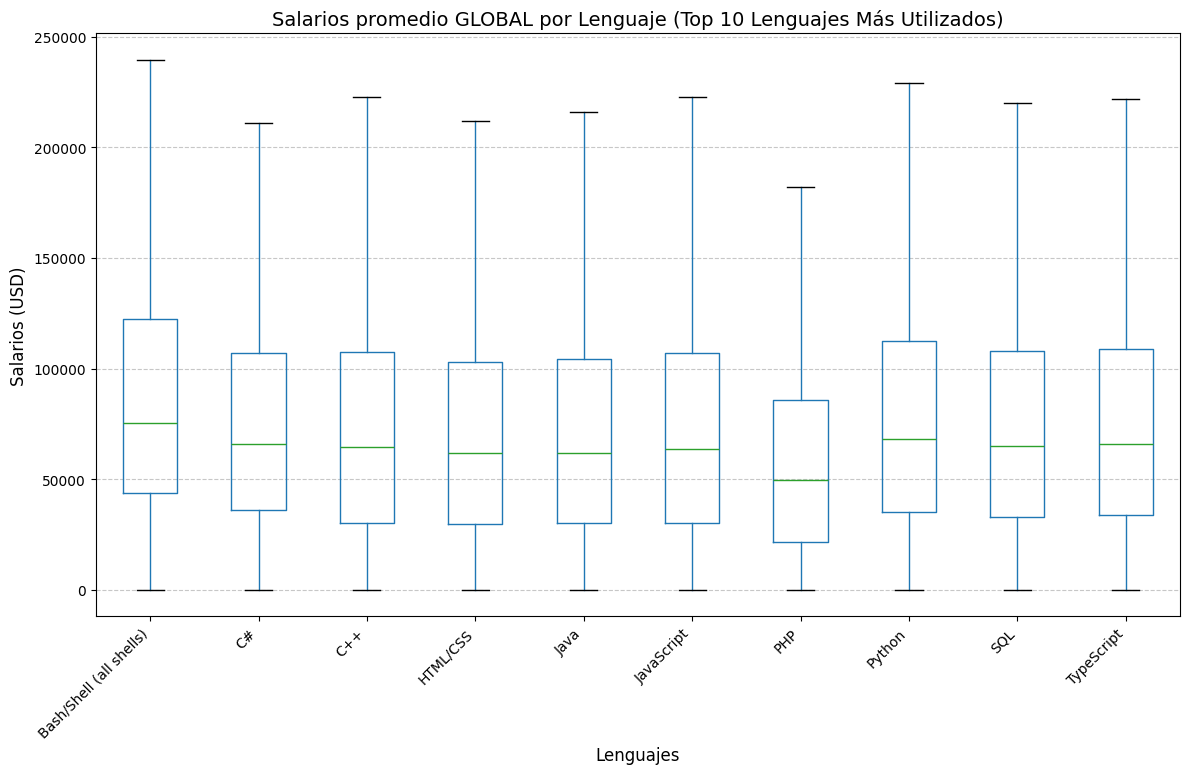

In [15]:
# Contar la frecuencia de uso de cada lenguaje
frecuencia_lenguajes = df_final_expandido['Lenguajes_Utilizados'].value_counts()

# Filtrar los 10 lenguajes más utilizados
top_10_lenguajes = frecuencia_lenguajes.head(10).index# Filtrar los datos para los 10 lenguajes más utilizados
datos_top_10 = df_final_expandido[df_final_expandido['Lenguajes_Utilizados'].isin(top_10_lenguajes)]

# Crear un boxplot para los salarios de los 10 lenguajes más utilizados
plt.figure(figsize=(12, 8))
datos_top_10.boxplot(
    column='Salario_Anual',
    by='Lenguajes_Utilizados',
    grid=False,
    showfliers=False,
    figsize=(12, 8),

)

# Configuración del gráfico
plt.title('Salarios promedio GLOBAL por Lenguaje (Top 10 Lenguajes Más Utilizados)', fontsize=14)
plt.suptitle('')  # Eliminar el título automático de Pandas
plt.xlabel('Lenguajes', fontsize=12)
plt.ylabel('Salarios (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()




Esto son promedios globales, vamos a verlo ahora solo con Españoles

<Figure size 1200x800 with 0 Axes>

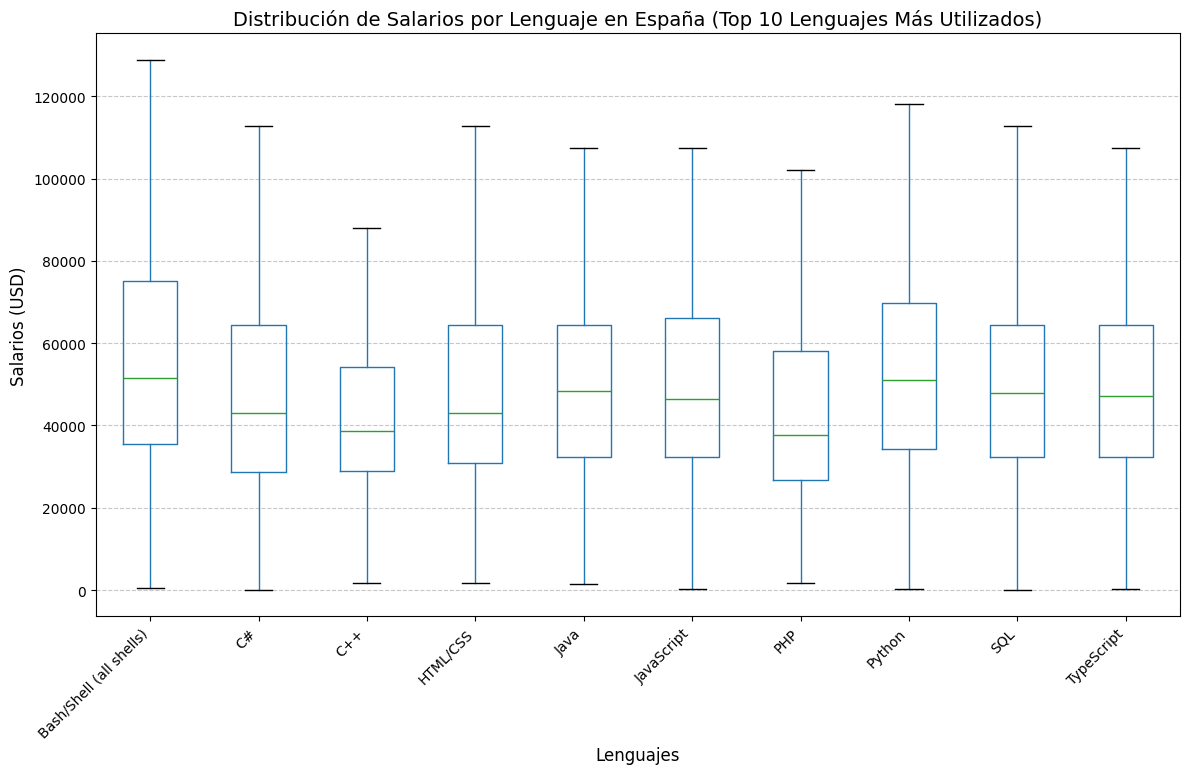

In [16]:

# Filtrar los datos para las personas de España
datos_espana = datos_top_10[datos_top_10['Pais'] == 'Spain']

# Crear un boxplot para los salarios en España
plt.figure(figsize=(12, 8))
datos_espana.boxplot(
    column='Salario_Anual',
    by='Lenguajes_Utilizados',
    grid=False,
    showfliers=False,
    figsize=(12, 8),
)

# Configuración del gráfico
plt.title('Distribución de Salarios por Lenguaje en España (Top 10 Lenguajes Más Utilizados)', fontsize=14)
plt.suptitle('')  # Eliminar el título automático de Pandas
plt.xlabel('Lenguajes', fontsize=12)
plt.ylabel('Salarios (USD)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.tight_layout()
plt.show()


### Primeras conclusiones

Basandonos en la media, la grafica global marca un promedio entre 50-100k y en España ronda entre 40-60k. Generalmente en España se cobra el minimo del promedio global.

C++ globalmente esta junto con la media, a diferencia de España, que esta por debajo junto con PHP.

#### A primera vista, todos los lenguajes estan bastante parejos

C:\Users\javid\AppData\Local\Temp\ipykernel_18364\120219397.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos_espana_python['Años_Exp'] = pd.Categorical(datos_espana_python['Años_Exp'], categories=orden_experiencia, ordered=True)


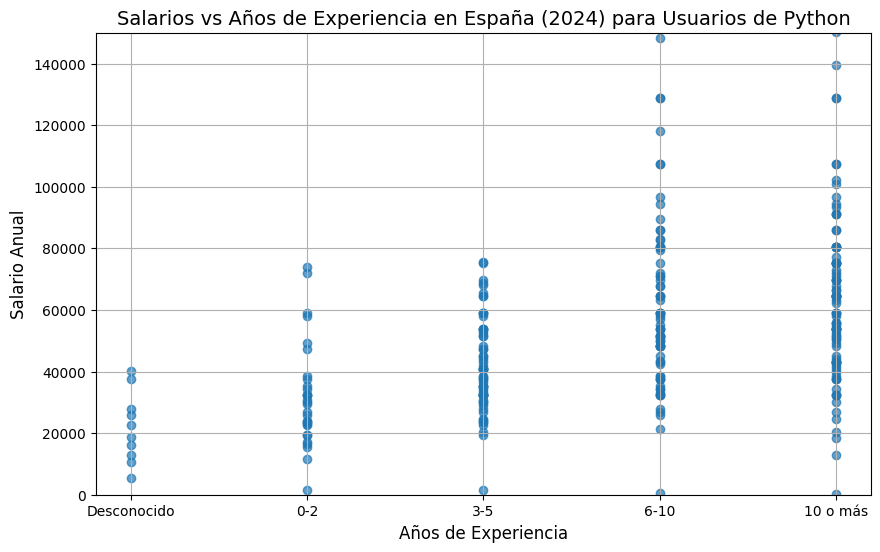

In [17]:
# Filtrar y ordenar los datos para "Spain" por años de experiencia con los nombres originales
datos_espana = df_final_expandido[df_final_expandido['Pais'] == 'Spain']
# Filtrar los datos para los que utilizan Python en "Lenguajes_Utilizados"
datos_espana_python = datos_espana[datos_espana['Lenguajes_Utilizados'] == 'Python']

# Crear una categoría ordenada para los años de experiencia
orden_experiencia = ['Desconocido', '0-2', '3-5', '6-10', '10 o más']
datos_espana_python['Años_Exp'] = pd.Categorical(datos_espana_python['Años_Exp'], categories=orden_experiencia, ordered=True)

# Ordenar los datos por los años de experiencia categóricos
datos_espana_python = datos_espana_python.sort_values(by='Años_Exp')

# Crear la gráfica de dispersión con el orden deseado en X
plt.figure(figsize=(10, 6))
plt.scatter(datos_espana_python['Años_Exp'], datos_espana_python['Salario_Anual'], alpha=0.7)
plt.ylim(0, 150000)  # Ajustar el rango máximo de Y

# Etiquetas y título
plt.title('Salarios vs Años de Experiencia en España (2024) para Usuarios de Python', fontsize=14)
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Salario Anual', fontsize=12)
plt.grid(True)
plt.show()





Aqui se puede ver el crecimiento normal a mas años de experiencia.

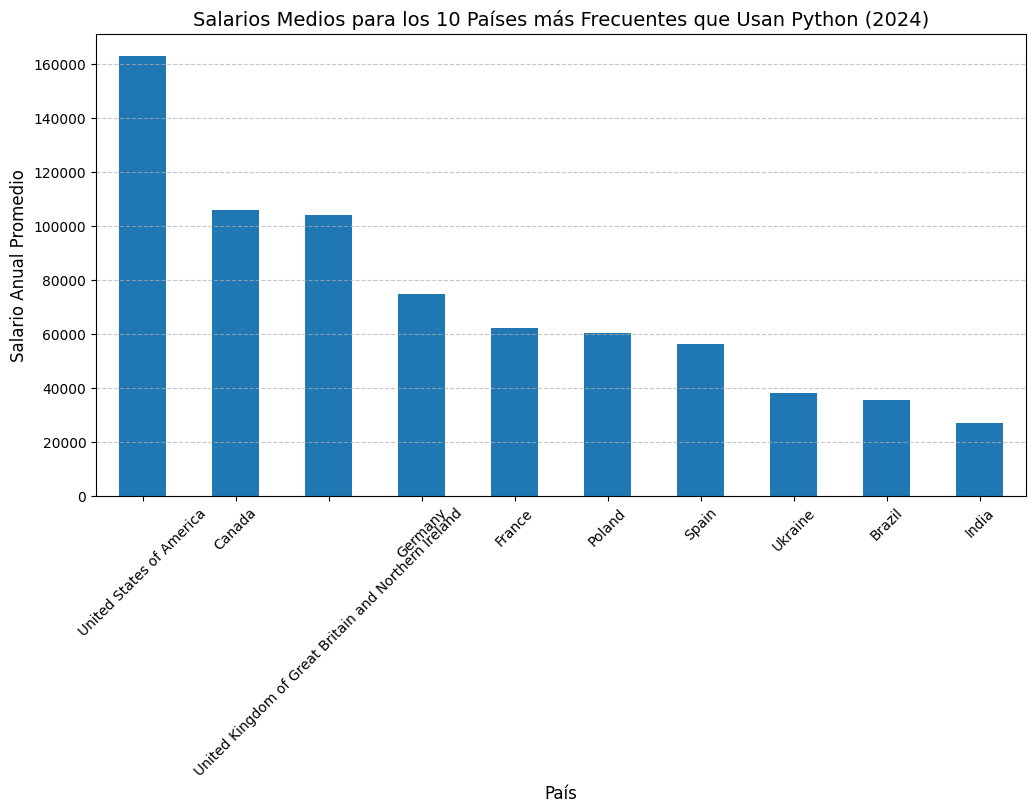

In [18]:
# Asegurar que la columna 'Lenguajes_Utilizados' sea de tipo cadena
df_final_expandido['Lenguajes_Utilizados'] = df_final_expandido['Lenguajes_Utilizados'].astype(str)

# Filtrar los datos para los que utilizan Python
usuarios_python = df_final_expandido[df_final_expandido['Lenguajes_Utilizados'].str.contains('Python', na=False)]

# Obtener los 10 países más frecuentes que usan Python
top_10_paises = usuarios_python['Pais'].value_counts().head(10).index

# Filtrar el dataset para estos 10 países
usuarios_python_top_10 = usuarios_python[usuarios_python['Pais'].isin(top_10_paises)]

# Crear una gráfica de barras con los salarios medios de estos 10 países
salarios_medios = usuarios_python_top_10.groupby('Pais')['Salario_Anual'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
salarios_medios.plot(kind='bar')
plt.title('Salarios Medios para los 10 Países más Frecuentes que Usan Python (2024)', fontsize=14)
plt.xlabel('País', fontsize=12)
plt.ylabel('Salario Anual Promedio', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


USA lidera el podio junto con Canada y Alemania. Saber o aprender Ingles y teletrabajar en una empresa americana, podría ser una manera de trabajar con los salarios mas altos.

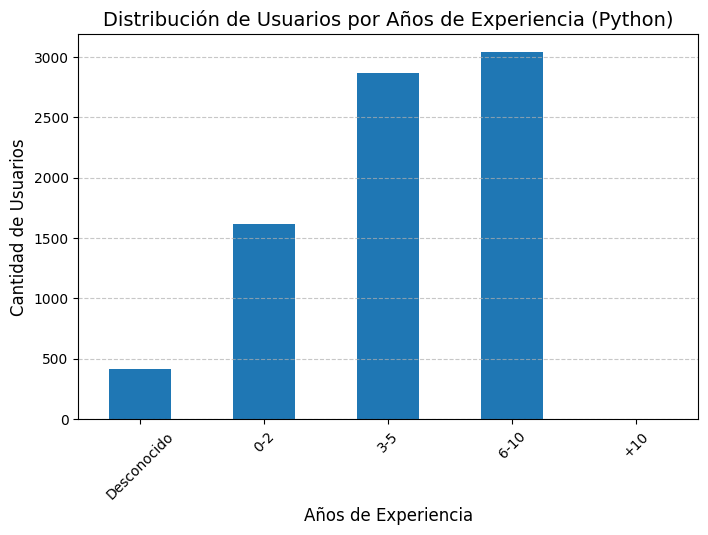

In [19]:
# Distribución de usuarios por años de experiencia
plt.figure(figsize=(8, 5))
usuarios_python['Años_Exp'].value_counts().reindex(['Desconocido', '0-2', '3-5', '6-10', '+10']).plot(kind='bar')
plt.title('Distribución de Usuarios por Años de Experiencia (Python)', fontsize=14)
plt.xlabel('Años de Experiencia', fontsize=12)
plt.ylabel('Cantidad de Usuarios', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

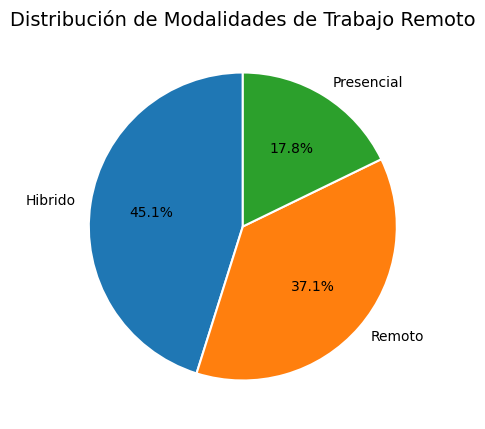

In [51]:
# Distribución de modalidades de trabajo remoto
plt.figure(figsize=(8, 5))
usuarios_python['Trabajo_Remoto'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'})
plt.title('Distribución de Modalidades de Trabajo Remoto', fontsize=14)
plt.ylabel('')  # Ocultar el título del eje Y
plt.show()